In [1]:
import numpy as np

Pricing American Option

5.a  Creating American  Call and Put Options and choosing the number of steps in the tree

In [21]:
def american_option(S_ini, K, T, r, u, d, N, opttype):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

    return C[0, 0], C, S,delta

Setting up same parameters as European Option

S_ini = 100
r =0.5
sigma =0.2
T =3/12
K =100
N=50

In [51]:
S_ini = 100
r =0.5
sigma =0.2
T =3/12
K =100
N=50

In [4]:
dt = T / N # Length of one time step
u = np.exp(sigma * np.sqrt(dt)) # Up factor
d = np.exp(-sigma * np.sqrt(dt)) # Down factor

In [5]:
## call option

In [9]:
opttype = 'C'

In [10]:
option_price, C, S = american_option(S_ini, K, T, r, u, d, N, opttype)

In [11]:
option_price

12.203282178073938

In [12]:
# Put option

In [13]:
opttype = 'P'

In [14]:
option_price, C, S = american_option(S_ini, K, T, r, u, d, N, opttype)

In [15]:
option_price

1.3503447389759942

Introducting Delta

Delta measures the sensitivity of an option price to change of underlying asset price


In [23]:
delta = np.zeros([N, N])

In [38]:
if isinstance(u, list): u = u[0]
if isinstance(d, list): d = d[0]

In [40]:
u

1.0142426086996437

In [41]:
d

0.985957394633712

In [44]:
dt

0.005

In [47]:
p = (np.exp(r * dt) - d) / (u - d)

In [48]:
p

0.58496050033476

In [50]:
N

[1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]

In [52]:
price, call, S, delta = american_option(100,100,T,0.5,u,d,N,'C')
print("Underlying: \n", S)
print("Call Price: \n", call)
print("Delta: \n", delta)

Underlying: 
 [[100.           0.           0.         ...   0.           0.
    0.        ]
 [ 98.59573946 101.42426087   0.         ...   0.           0.
    0.        ]
 [ 97.2111984  100.         102.86880693 ...   0.           0.
    0.        ]
 ...
 [ 50.72138802  52.17648671  53.67332938 ... 197.15548787   0.
    0.        ]
 [ 50.00912758  51.4437929   52.919616   ... 194.38691115 199.96349633
    0.        ]
 [ 49.30686914  50.72138802  52.17648671 ... 191.65721247 197.15548787
  202.81149816]]
Call Price: 
 [[ 12.20328218   0.           0.         ...   0.           0.
    0.        ]
 [ 10.73856042  13.29474691   0.         ...   0.           0.
    0.        ]
 [  9.33973126  11.77700548  14.42850054 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...  97.65423995   0.
    0.        ]
 [  0.           0.           0.         ...  94.63659891 100.21318409
    0.        ]
 [  0.           0.           0.         ...  91.65721247  97.155487

Choosing Number of Steps : To determine number of steps, we will demonstrate convergency with step function

In [53]:
price_array = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500,3000]:
    price, call, S, delta = american_option(100, 90, 1, 0, 1.2, 0.8, N,'C')
    price_array.append(price)
    print("With N = {:3d}, the price is {:.2f}".format(N, price))

With N =   1, the price is 15.00
With N =  10, the price is 29.38
With N = 100, the price is 70.32
With N = 200, the price is 85.40
With N = 300, the price is 92.33
With N = 400, the price is 95.84
With N = 500, the price is 97.70
With N = 600, the price is 98.71
With N = 700, the price is 99.27
With N = 800, the price is 99.58
With N = 900, the price is 99.76
With N = 1000, the price is 99.86
With N = 1500, the price is 99.99
With N = 2000, the price is 100.00
With N = 2500, the price is 100.00
With N = 3000, the price is 100.00


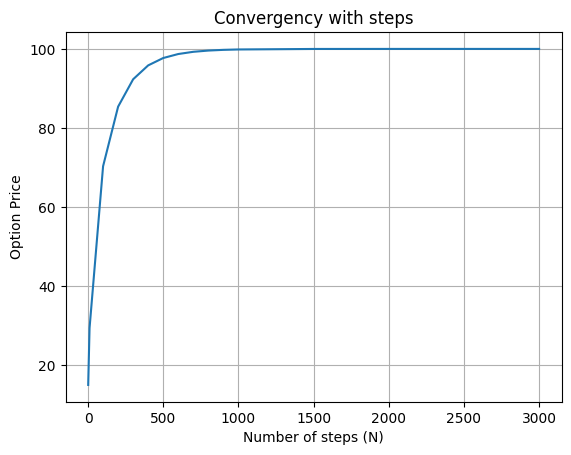

In [55]:
import matplotlib.pyplot as plt

N = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500,3000]
plt.plot(N, np.array(price_array))
plt.title("Convergency with steps")
plt.xlabel("Number of steps (N)")
plt.ylabel("Option Price")
plt.grid(True)
plt.show()

Doing same with American put Option

In [57]:
S_ini = 100
r =0.5
sigma =0.2
T =3/12
K =100
N=50

In [58]:
price, put, S, delta = american_option(100,100,T,0.5,u,d,N,'P')
print("Underlying: \n", S)
print("Call Price: \n", call)
print("Delta: \n", delta)

Underlying: 
 [[100.           0.           0.         ...   0.           0.
    0.        ]
 [ 98.59573946 101.42426087   0.         ...   0.           0.
    0.        ]
 [ 97.2111984  100.         102.86880693 ...   0.           0.
    0.        ]
 ...
 [ 50.72138802  52.17648671  53.67332938 ... 197.15548787   0.
    0.        ]
 [ 50.00912758  51.4437929   52.919616   ... 194.38691115 199.96349633
    0.        ]
 [ 49.30686914  50.72138802  52.17648671 ... 191.65721247 197.15548787
  202.81149816]]
Call Price: 
 [[9.99999968e+001 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [7.99999971e+001 1.19999996e+002 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [6.39999974e+001 9.59999968e+001 1.43999996e+002 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 ...
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 2.42870994e+239
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 .

In [59]:
price_array = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500,3000]:
    price, put, S, delta = american_option(100, 90, 1, 0, 1.2, 0.8, N,'P')
    price_array.append(price)
    print("With N = {:3d}, the price is {:.2f}".format(N, price))

With N =   1, the price is 5.00
With N =  10, the price is 19.38
With N = 100, the price is 60.32
With N = 200, the price is 75.40
With N = 300, the price is 82.33
With N = 400, the price is 85.84
With N = 500, the price is 87.70
With N = 600, the price is 88.71
With N = 700, the price is 89.27
With N = 800, the price is 89.58
With N = 900, the price is 89.76
With N = 1000, the price is 89.86
With N = 1500, the price is 89.99
With N = 2000, the price is 90.00
With N = 2500, the price is 90.00
With N = 3000, the price is 90.00


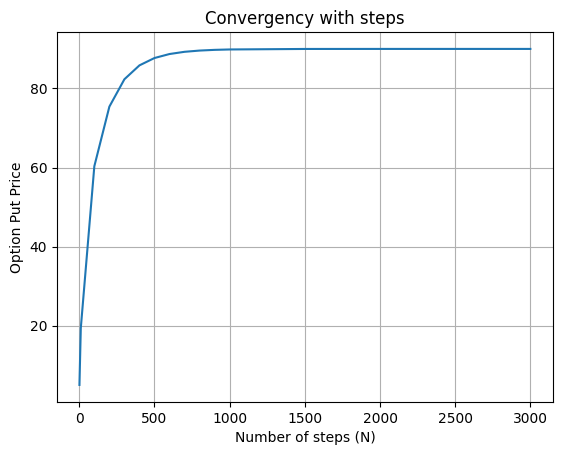

In [60]:
import matplotlib.pyplot as plt

N = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500,3000]
plt.plot(N, np.array(price_array))
plt.title("Convergency with steps")
plt.xlabel("Number of steps (N)")
plt.ylabel("Option Put Price")
plt.grid(True)
plt.show()

9.A Compute Greek Delta for the European call and European Put options

In [62]:
def american_call_option_delta(S_ini, K, T, r, u, d, N):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probabilities
    C = np.zeros([N + 1, N + 1])  # Call prices
    S = np.zeros([N + 1, N + 1])  # Underlying prices
    Delta = np.zeros([N, N])  # Delta

    # Compute stock prices and option values at maturity
    for i in range(N + 1):
        S[N, i] = S_ini * (u ** i) * (d ** (N - i))
        C[N, i] = max(S[N, i] - K, 0)  # Payoff for call option at maturity

    # Backward induction to compute option prices and deltas at earlier nodes
    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            S[j, i] = S_ini * (u ** i) * (d ** (j - i))
            hold_value = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            exercise_value = max(S[j, i] - K, 0)
            C[j, i] = max(hold_value, exercise_value)
            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (S[j + 1, i + 1] - S[j + 1, i])

    return C[0, 0], Delta[0, 0]


In [63]:
S_ini = 100
r =0.5
sigma =0.2
T =3/12
K =100
N=50

In [64]:
dt = T / N
u = np.exp(sigma * np.sqrt(dt))
d = 1 / u

In [65]:
call_price, delta = american_call_option_delta(S_ini, K, T, r, u, d, N)

In [66]:
print("American Call Option Price: ", call_price)
print("Delta: ", delta)

American Call Option Price:  12.203282178073941
Delta:  0.9037182759041297


American Put Option

In [67]:
def american_put_option_delta(S_ini, K, T, r, u, d, N):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probabilities
    P = np.zeros([N + 1, N + 1])  # Put prices
    S = np.zeros([N + 1, N + 1])  # Underlying prices
    Delta = np.zeros([N, N])  # Delta

    # Compute stock prices and option values at maturity
    for i in range(N + 1):
        S[N, i] = S_ini * (u ** i) * (d ** (N - i))
        P[N, i] = max(K - S[N, i], 0)  # Payoff for put option at maturity

    # Backward induction to compute option prices and deltas at earlier nodes
    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            S[j, i] = S_ini * (u ** i) * (d ** (j - i))
            hold_value = np.exp(-r * dt) * (p * P[j + 1, i + 1] + (1 - p) * P[j + 1, i])
            exercise_value = max(K - S[j, i], 0)
            P[j, i] = max(hold_value, exercise_value)
            Delta[j, i] = (P[j + 1, i + 1] - P[j + 1, i]) / (S[j + 1, i + 1] - S[j + 1, i])

    return P[0, 0], Delta[0, 0]

In [68]:
put_price, delta = american_put_option_delta(S_ini, K, T, r, u, d, N)

In [69]:
print("American Put Option Price: ", put_price)
print("Delta: ", delta)

American Put Option Price:  1.350344738976
Delta:  -0.37379742746043


10. Sensitivty computation

In [1]:
import numpy as np

# Defining the American Call Option Price
def binomial_tree_call_american(S_ini, K, T, r, u, d, N):
    dt = T / N  # Time step
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probabilities
    C = np.zeros([N + 1, N + 1])  # Call prices

    for i in range(N + 1):
        C[N, i] = max(S_ini * (u ** i) * (d ** (N - i)) - K, 0)

    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            early_exercise = max(S_ini * (u ** i) * (d ** (j - i)) - K, 0)
            hold = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            C[j, i] = max(early_exercise, hold)

    return C[0, 0]

# Defining the American Put Option Price
def binomial_tree_put_american(S_ini, K, T, r, u, d, N):
    dt = T / N  # Time step
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probabilities
    P = np.zeros([N + 1, N + 1])  # Put prices

    for i in range(N + 1):
        P[N, i] = max(K - (S_ini * (u ** i) * (d ** (N - i))), 0)

    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            early_exercise = max(K - (S_ini * (u ** i) * (d ** (j - i))), 0)
            hold = np.exp(-r * dt) * (p * P[j + 1, i + 1] + (1 - p) * P[j + 1, i])
            P[j, i] = max(early_exercise, hold)

    return P[0, 0]

# Defining function to calculate the Vega for Call and Put Options
def vega_sensitivity_american(S_ini, K, T, r, sigma1, sigma2, N):
    dt = T / N # Define time Step
    u1 = np.exp(sigma1 * np.sqrt(dt)) # Up factor for initial volatility
    d1 = 1 / u1 # Down factor for initial volatility
    u2 = np.exp((sigma1 + sigma2) * np.sqrt(dt)) # Up factor for increased volatility
    d2 = 1 / u2 # Down factor for increased volatility

    # Calculating the American Call and Put Options Prices
    call_price_sigma1 = binomial_tree_call_american(S_ini, K, T, r, u1, d1, N)
    put_price_sigma1 = binomial_tree_put_american(S_ini, K, T, r, u1, d1, N)

    call_price_sigma2 = binomial_tree_call_american(S_ini, K, T, r, u2, d2, N)
    put_price_sigma2 = binomial_tree_put_american(S_ini, K, T, r, u2, d2, N)

    # Calculating Sensitivities
    call_vega_sensitivity = (call_price_sigma2 - call_price_sigma1) / sigma2
    put_vega_sensitivity = (put_price_sigma2 - put_price_sigma1) / sigma2

    return call_vega_sensitivity, put_vega_sensitivity

# Parameter
S_ini = 100
K = 100
r = 0.05
T = 3 / 12 # Month in year
N = 50 # Number of time steps

# A 5% increase in volatility (from 20% to 25%)
sigma1 = 0.20
sigma2 = 0.05 # Increment in volatility

# Computing Vega Sensitivities
call_vega_sensitivity, put_vega_sensitivity = vega_sensitivity_american(S_ini, K, T, r, sigma1, sigma2, N)

print("Vega Sensitivity of the Call Option Price: {:.2f}".format(call_vega_sensitivity))
print("Vega Sensitivity of the Put Option Price: {:.2f}".format(put_vega_sensitivity))


Vega Sensitivity of the Call Option Price: 19.57
Vega Sensitivity of the Put Option Price: 19.53


Step 2

European Option using Trinomial Tree

In [40]:
import numpy as np

def american_option_trinomial(S0, K, T, r, sigma, N, option_type='call'):
    # Calculate parameters
    dt = T / N
    u = np.exp(sigma * np.sqrt(2 * dt))
    d = 1 / u
    m = 1

    pu = ((np.exp((r - 0.5 * sigma**2) * dt / 2) - np.exp(-sigma * np.sqrt(dt / 2))) /
          (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2))))**2
    pd = ((np.exp(sigma * np.sqrt(dt / 2)) - np.exp((r - 0.5 * sigma**2) * dt / 2)) /
          (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2))))**2
    pm = 1 - pu - pd

    discount = np.exp(-r * dt)

    # Initialize asset prices at maturity
    asset_prices = np.zeros((2 * N + 1, N + 1))
    asset_prices[N, 0] = S0

    for i in range(1, N + 1):
        for j in range(N - i, N + i + 1, 2):
            asset_prices[j, i] = S0 * (u ** ((j - N + i) // 2)) * (d ** ((N + i - j) // 2))

    # Initialize option values at maturity
    option_values = np.zeros((2 * N + 1, N + 1))

    if option_type == 'call':
        option_values[:, N] = np.maximum(0, asset_prices[:, N] - K)
    elif option_type == 'put':
        option_values[:, N] = np.maximum(0, K - asset_prices[:, N])

    # Backward induction for the possibility of early exercise
    for i in range(N - 1, -1, -1):
        for j in range(N - i, N + i + 1, 2):
            hold_value = (pu * option_values[j - 1, i + 1] +
                          pm * option_values[j, i + 1] +
                          pd * option_values[j + 1, i + 1]) * discount
            if option_type == 'call':
                exercise_value = max(0, asset_prices[j, i] - K)
            elif option_type == 'put':
                exercise_value = max(0, K - asset_prices[j, i])
            option_values[j, i] = max(hold_value, exercise_value)

    return option_values[N, 0]

# Example usage
S0 = 100  # Initial stock price
K_arr = [90,95,100,105,110]   # Different strike prices for Deep OTM, OTM, ATM, ITM, and Deep ITM
T = 1     # Time to maturity (in years)
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
N = 50    # Number of time steps

for K in K_arr:
    call_price = american_option_trinomial(S0, K, T, r, sigma, N, option_type='call')
    put_price = american_option_trinomial(S0, K, T, r, sigma, N, option_type='put')
    print(f"European Call Option Price for K = {K}: {np.round(call_price, 2)}")


European Call Option Price for K = 90: 10.0
European Call Option Price for K = 95: 5.0
European Call Option Price for K = 100: 1.08
European Call Option Price for K = 105: 0.23
European Call Option Price for K = 110: 0.05


In [44]:
import numpy as np

def american_option_trinomial(S0, K, T, r, sigma, N, option_type='call'):
    # Calculate parameters
    dt = T / N
    u = np.exp(sigma * np.sqrt(2 * dt))
    d = 1 / u
    m = 1

    pu = ((np.exp((r - 0.5 * sigma**2) * dt / 2) - np.exp(-sigma * np.sqrt(dt / 2))) /
          (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2))))**2
    pd = ((np.exp(sigma * np.sqrt(dt / 2)) - np.exp((r - 0.5 * sigma**2) * dt / 2)) /
          (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2))))**2
    pm = 1 - pu - pd

    discount = np.exp(-r * dt)

    # Initialize asset prices at maturity
    asset_prices = np.zeros((2 * N + 1, N + 1))
    asset_prices[N, 0] = S0

    for i in range(1, N + 1):
        for j in range(N - i, N + i + 1, 2):
            asset_prices[j, i] = S0 * (u ** ((j - N + i) // 2)) * (d ** ((N + i - j) // 2))

    # Initialize option values at maturity
    option_values = np.zeros((2 * N + 1, N + 1))

    if option_type == 'call':
        option_values[:, N] = np.maximum(0, asset_prices[:, N] - K)
    elif option_type == 'put':
        option_values[:, N] = np.maximum(0, K - asset_prices[:, N])

    # Backward induction for the possibility of early exercise
    for i in range(N - 1, -1, -1):
        for j in range(N - i, N + i + 1, 2):
            hold_value = (pu * option_values[j - 1, i + 1] +
                          pm * option_values[j, i + 1] +
                          pd * option_values[j + 1, i + 1]) * discount
            if option_type == 'call':
                exercise_value = max(0, asset_prices[j, i] - K)
            elif option_type == 'put':
                exercise_value = max(0, K - asset_prices[j, i])
            option_values[j, i] = max(hold_value, exercise_value)

    return option_values[N, 0]

# Example usage
S0 = 100  # Initial stock price
K_arr = [90,95,100,105,110]   # Different strike prices for Deep OTM, OTM, ATM, ITM, and Deep ITM
T = 1     # Time to maturity (in years)
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
N = 50    # Number of time steps

for K in K_arr:
    call_price = american_option_trinomial(S0, K, T, r, sigma, N, option_type='call')
    put_price = american_option_trinomial(S0, K, T, r, sigma, N, option_type='put')
    print(f"European put Option Price for K = {K}: {np.round(put_price, 2)}")

European put Option Price for K = 90: 0.03
European put Option Price for K = 95: 0.2
European put Option Price for K = 100: 1.06
European put Option Price for K = 105: 5.0
European put Option Price for K = 110: 10.0


American put Option with Dynamic Delta Hedging

In [2]:
import numpy as np

In [3]:
def american_option(S_ini, K, T, r, u, d, N, opttype):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

    return C[0, 0], C, S

S_ini = 180  # Initial stock price
K = 182      # Strike price
T = 0.5        # Time to maturity (in years)
r = 0.02     # Risk-free rate
sigma = 0.25  # Volatility
N = 3       # Number of time steps
u = np.exp(sigma * np.sqrt(T/N))
d = np.exp(-sigma * np.sqrt(T/N))

put_price, P, S = american_option(180, 182, 0.5, 0.02, u, d, 3, opttype="P")
print("American put price at t=0 is", np.round(put_price, 2))
print("Asset prices in the tree:\n", np.round(S, 2))
print("American put prices in the tree:\n", np.round(P, 2))

American put price at t=0 is 13.98
Asset prices in the tree:
 [[180.     0.     0.     0.  ]
 [162.54 199.34   0.     0.  ]
 [146.77 180.   220.76   0.  ]
 [132.52 162.54 199.34 244.48]]
American put prices in the tree:
 [[13.98  0.    0.    0.  ]
 [22.71  5.01  0.    0.  ]
 [35.23  9.88  0.    0.  ]
 [49.48 19.46  0.    0.  ]]


In [4]:
## Delta = [P_u -P_d]/[S_u - S_d]

In [5]:
delta_0 = np.round((5.01-22.71)/(199.34 - 162.53), 2)
delta_1 = np.round((0-9.88)/(220.76 - 180.00), 2)
delta_2 = np.round((0-0)/(244.48 - 199.34), 2)

print("delta at t=0:", delta_0)
print("delta at t=1:", delta_1)
print("delta at t=2:", delta_2)

delta at t=0: -0.48
delta at t=1: -0.24
delta at t=2: 0.0
